In [1]:
# Import Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 as cv
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
# Gọi các thư viện cần thiết 
import numpy as np
import pandas as pd # Xu lý bảng
import seaborn as sns # Vẽ biểu đồ thị của dữ liệu
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler # Xử lý chuẩn hóa dữ liệu
from sklearn.model_selection import train_test_split # Chia dữ liệu ra làm 2 phần
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM    # LSTM  biên dạng ANN, BatchNormalization: cho nhỏ lại
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical # Sử dung để làm nổi đối tượng cần phân loại
from keras import callbacks 
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score # Để đo lường

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM
from keras.models import Sequential 
from tensorflow.keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import keras
from keras.models import Sequential
from keras.layers import Dense # fully connected
from keras.datasets import boston_housing
from tensorflow.keras.optimizers import RMSprop # toi uu
from keras.callbacks import EarlyStopping # dung lai ngay lap tuc
from sklearn.preprocessing import scale # xu li du lieu
from sklearn.preprocessing import StandardScaler # xu li du lieu

In [7]:
# Create dataframe
dataR = []
l1 = 50
l2 = 40
l3 = 20
for theta1 in range (-90,90):
  for theta2 in range (-40,40):
    for theta3 in range (-20,20):

      px = l1*np.cos(np.radians(theta1)) + l2*np.cos(np.radians(theta1 + theta2)) + l3*np.cos(np.radians(theta1 + theta2+ theta3))
      py = l1*np.sin(np.radians(theta1)) + l2*np.sin(np.radians(theta1 + theta2)) + l3*np.sin(np.radians(theta1 + theta2+ theta3))
      ci = theta1 + theta2 +theta3
      dataR.append([theta1,theta2,theta3,px,py,ci])

data = pd.DataFrame(dataR,columns=['theta1','theta2','theta3','Px','Py','ci'])
data

,theta1,theta2,theta3,Px,Py,ci
0,-90,-40,-20,-43.032012,-90.641778,-150
1,-90,-40,-19,-42.854850,-90.942539,-149
2,-90,-40,-18,-42.672466,-91.240163,-148
3,-90,-40,-17,-42.484916,-91.534558,-147
4,-90,-40,-16,-42.292256,-91.825636,-146
...,...,...,...,...,...,...
575995,89,39,15,-39.726549,93.549115,143
575996,89,39,16,-39.934179,93.268520,144
575997,89,39,17,-40.136880,92.984344,145
575998,89,39,18,-40.334590,92.696673,146


In [8]:
# Handles data
X=data.drop(['theta1','theta2','theta3'],axis =1) # toa do
Y=data.drop(['Px','Py','ci'],axis =1) # goc quay
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state =7)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(460800, 3) (460800, 3) (115200, 3) (115200, 3)


In [11]:
# Create model
model = Sequential()
model.add(Dense(64,kernel_initializer='normal',activation='relu',input_shape=(3,)))
model.add(Dense(64,activation ='relu'))
model.add(Dense(64,activation ='relu'))
model.add(Dense(64,activation ='relu'))
model.add(Dense(64,activation ='relu'))
model.add(Dense(3))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                256       
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 3)                 195       
                                                                 
Total params: 17,091
Trainable params: 17,091
Non-trai

In [13]:
# Compile model
model.compile(loss='mse', optimizer=RMSprop(), metrics = ['accuracy']) # bien dich
# Train model
history = model.fit(X_train, Y_train, batch_size = 128, epochs=100,verbose=1,validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])


Epoch 1/100
2880/2880 [==============================] - 7s 2ms/step - loss: 95.8232 - accuracy: 0.8002 - val_loss: 86.0006 - val_accuracy: 0.8139
Epoch 2/100
2880/2880 [==============================] - 7s 3ms/step - loss: 94.2436 - accuracy: 0.8019 - val_loss: 81.0212 - val_accuracy: 0.8180
Epoch 3/100
2880/2880 [==============================] - 9s 3ms/step - loss: 93.2190 - accuracy: 0.8040 - val_loss: 85.9638 - val_accuracy: 0.8208
Epoch 4/100
2880/2880 [==============================] - 8s 3ms/step - loss: 91.6741 - accuracy: 0.8049 - val_loss: 75.5914 - val_accuracy: 0.8187
Epoch 5/100
2880/2880 [==============================] - 7s 2ms/step - loss: 91.0218 - accuracy: 0.8059 - val_loss: 107.6385 - val_accuracy: 0.7953
Epoch 6/100
2880/2880 [==============================] - 6s 2ms/step - loss: 89.7575 - accuracy: 0.8087 - val_loss: 97.3727 - val_accuracy: 0.7958
Epoch 7/100
2880/2880 [==============================] - 6s 2ms/step - loss: 88.9911 - accuracy: 0.8083 - val_loss: 9

In [14]:
# Result
score = model.evaluate(X_test,Y_test,verbose=0)
print('Sai so kiem tra la:', score[0])
print('Do chinh xac ', score[1])

Sai so kiem tra la: 69.42227172851562
Do chinh xac  0.8410242795944214


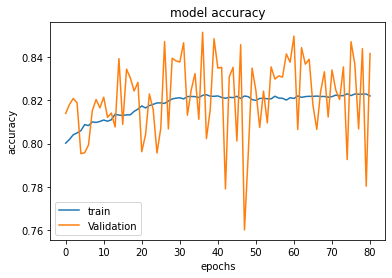

In [15]:
# Draw plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [16]:
# Save model
from tensorflow.keras.models import load_model
model.save('Final12.h5')
model_ANN = load_model('Final12.h5')

In [17]:
# Using model
sd = np.array([[50,35,14],[23,15,11]])
y_predict = model_ANN(sd)
print(y_predict)

tf.Tensor(
[[  10.181562  -53.636353   17.644   ]
 [  85.433624 -147.32158   108.14158 ]], shape=(2, 3), dtype=float32)
